# **Final Project Task 3 - Census Modeling Regression**

Requirements

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup:
    - Implement multiple models, to solve a regression problem using traditional ML:
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection:
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation:
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Compare the results across different models. Save all experiment results into a table.

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
#Import data from task1
data = pd.read_csv(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project/data_task1.csv")
data.head(10)

age    fnlwgt  education  education-num  sex  capital-gain  \
0  0.030390 -1.063569  Bachelors       1.134777    1      0.611335   
1  0.836973 -1.008668  Bachelors       1.134777    1     -0.251583   
2 -0.042936  0.245040    HS-grad      -0.420679    1     -0.251583   
3  1.056950  0.425752       11th      -1.198407    1     -0.251583   
4 -0.776193  1.408066  Bachelors       1.134777    0     -0.251583   
5 -0.116262  0.898122    Masters       1.523641    0     -0.251583   
6  0.763647 -0.280365        9th      -1.976134    0     -0.251583   
7  0.983625  0.188160    HS-grad      -0.420679    1     -0.251583   
8 -0.556216 -1.364218    Masters       1.523641    0      5.338724   
9  0.250367 -0.287356  Bachelors       1.134777    1      1.803701   

   capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
0     -0.218867       -0.029928       0                False  ...   
1     -0.218867       -2.273618       0                False  ...   
2     -0.218867       -0.029928       0                False  ...   
3     -0.218867       -0.029928       0                False  ...   
4     -0.218867       -0.029928       0                False  ...   
5     -0.218867       -0.029928       0                False  ...   
6     -0.218867       -2.024319       0                False  ...   
7     -0.218867        0.385570       1                False  ...   
8     -0.218867        0.801069       1                False  ...   
9     -0.218867       -0.029928       1                False  ...   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   
5                    False                           False   
6                    False                           False   
7                    False                           False   
8                    False                           False   
9                    False                           False   

   native-country_United-States  native-country_Vietnam  \
0                          True                   False   
1                          True                   False   
2                          True                   False   
3                          True                   False   
4                         False                   False   
5                          True                   False   
6                         False                   False   
7                          True                   False   
8                          True                   False   
9                          True                   False   

   native-country_Yugoslavia  capital_balance  capital_gain_loss_ratio  \
0                      False         0.830202                 2.062817   
1                      False        -0.032716                 0.958118   
2                      False        -0.032716                 0.958118   
3                      False        -0.032716                 0.958118   
4                      False        -0.032716                 0.958118   
5                      False        -0.032716                 0.958118   
6                      False        -0.032716                 0.958118   
7                      False        -0.032716                 0.958118   
8                      False         5.557591                 8.114783   
9                      False         2.022568                 3.589275   

   high_hour_worker  part_time_worker  experience_years  
0                 0                 1                 0  
1                 0                 1                 0  
2                 0                 1                 0  
3                 0                 1                 0  
4                 0                 1  

In [128]:
data.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
     

In [129]:
data.describe()

age        fnlwgt  education-num           sex  capital-gain  \
count  3.253700e+04  3.253700e+04   3.253700e+04  32537.000000  3.253700e+04   
mean  -7.883515e-17 -1.241490e-16   5.481336e-17      0.669238 -2.107366e-17   
std    1.000015e+00  1.000015e+00   1.000015e+00      0.470495  1.000015e+00   
min   -1.582777e+00 -1.681551e+00  -3.531590e+00      0.000000 -2.515826e-01   
25%   -7.761933e-01 -6.816726e-01  -4.206787e-01      0.000000 -2.515826e-01   
50%   -1.162616e-01 -1.082361e-01  -3.181473e-02      1.000000 -2.515826e-01   
75%    6.903217e-01  4.472760e-01   7.459132e-01      1.000000 -2.515826e-01   
max    3.770003e+00  1.226778e+01   2.301369e+00      1.000000  5.702309e+00   

       capital-loss  hours-per-week        income  capital_balance  \
count  3.253700e+04    3.253700e+04  32537.000000     3.253700e+04   
mean  -4.957224e-17   -3.712459e-17      0.240926     1.681525e-17   
std    1.000015e+00    1.000015e+00      0.427652     1.452650e+00   
min   -2.188670e-01   -3.270814e+00      0.000000    -5.240014e+00   
25%   -2.188670e-01   -2.992782e-02      0.000000    -3.271557e-02   
50%   -2.188670e-01   -2.992782e-02      0.000000    -3.271557e-02   
75%   -2.188670e-01    3.855704e-01      0.000000    -3.271557e-02   
max    4.988431e+00    3.294058e+00      1.000000     5.921176e+00   

       capital_gain_loss_ratio  high_hour_worker  part_time_worker  \
count             32537.000000           32537.0           32537.0   
mean                  1.242050               0.0               1.0   
std                   1.301265               0.0               0.0   
min                   0.124977               0.0               1.0   
25%                   0.958118               0.0               1.0   
50%                   0.958118               0.0               1.0   
75%                   0.958118               0.0               1.0   
max                   8.580240               0.0               1.0   

       experience_years  
count           32537.0  
mean                0.0  
std                 0.0  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 0.0  
max                 0.0

# Identifying and removing redundant features

In [130]:
data.drop(columns=['education', 'high_hour_worker', 'part_time_worker'], inplace=True)

In [131]:
#Compute the correlation matrix for the dataset to assess relationships between features
corr_matrix = data.corr()

#Define a threshold to flag strong correlations that may indicate multicollinearity
corr_threshold = 0.80

#Identify pairs of features with high correlation, excluding self-correlation
high_correlations = [
    (feature_1, feature_2, corr_matrix.loc[feature_1, feature_2])
    for idx_1, feature_1 in enumerate(corr_matrix.columns)
    for idx_2, feature_2 in enumerate(corr_matrix.columns[idx_1 + 1:])
    if abs(corr_matrix.loc[feature_1, feature_2]) > corr_threshold
]

# Convert the identified feature pairs into a DataFrame for easier analysis
df_high_corr = pd.DataFrame(high_correlations, columns=["Feature 1", "Feature 2", "Correlation"])


print('Strongly correlated feature pairs (threshold > 0.85):')
print(df_high_corr)



Strongly correlated feature pairs (threshold > 0.85):
         Feature 1                Feature 2  Correlation
0     capital-gain  capital_gain_loss_ratio     0.991195
1  capital_balance  capital_gain_loss_ratio     0.810400


In [132]:
#Remove the identified redundant features from the dataset
data.drop(columns=['experience_years','capital_balance','capital_gain_loss_ratio'], inplace=True)

#Display the remaining columns to verify the changes
print(data.columns)


Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationsh

Removing redundant variables is a key step in data preprocessing for machine learning and statistical modeling. Highly correlated features can cause multicollinearity making it harder to interpret model coefficients and leading to overfitting. They also add unnecessary complexity increasing computation time without improving predictive power. After analyzing the correlation matrix, I identified and removed the following redundant features: capital_balance, capital_gain_loss_ratio. I also removed the variable experience_years because the machine learning models achieved better performance metrics without it.

The education column was removed because it had a direct numerical equivalent, education-num, which conveys the same information in a more practical format.I also dropped high_hour_worker and part_time_worker since they are directly derived from hours_per_week, our target variable. Keeping them could lead to data leakage and reduce the model’s ability to learn meaningful relationships.

In [133]:
#Define the target variable
target = "hours-per-week"

#Split features (x) and target variable (y)
X = data.drop(columns=[target])
y = data[target]

## Split the dataset

A validation set is essential when performing hyperparameter tuning as it helps assess different parameter choices without overfitting to the test set. By splitting the data into train (70%), validation (15%) and test (15%), we ensure that the model is trained on one subset, fine-tuned on another and finally evaluated on unseen data. This approach prevents data leakage and improves generalization. Since I will be working on hyperparameter tuning, I choose to include a validation set in my data split.

In [134]:
#Split data into train (70%) and temp (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

#Split temp set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Print the shapes of the resulting sets
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (22775, 82), Validation set: (4881, 82), Test set: (4881, 82)


## Preprocess transforms

In [135]:
#Calculate the mean and std for each feature in the training dataset
feature_mean = X_train.mean()
feature_std = X_train.std()

#Store the computed values in a DataFrame for easy inspection
features_summary = pd.DataFrame({"Mean": feature_mean, "Standard Deviation": feature_std})

# Display the first few rows to verify the standardization process
print("Features summary: Mean and standard deviation of training data")
print(features_summary.head(7))


Features summary: Mean and standard deviation of training data
                   Mean  Standard Deviation
age           -0.001947            0.998329
fnlwgt         0.007067            0.999578
education-num  0.001497            0.998436
sex            0.667398            0.471155
capital-gain  -0.010661            0.980499
capital-loss   0.005340            1.013206
income         0.240703            0.427519


Fnlwgt has a very high mean and variance so StandardScaler will be used to normalize it with a mean of 0 and a standard deviation of 1. Capital-gain and capital-loss both exhibit extreme variability, suggesting the presence of outliers, making RobustScaler the better choice since it is less sensitive to outliers. Age has a relatively normal distribution, so either StandardScaler (for centering) or MinMaxScaler (for scaling between 0 and 1) can be used. Education-num has small values, making scaling optional, but StandardScaler is preferred for models sensitive to feature scaling.

In [ ]:
"""
def apply_scaling(X_train, X_val, X_test, standard_columns, robust_columns):
    """Apply StandardScaler to some columns and RobustScaler to others in train, validation, and test sets."""
    
    #Create copies to avoid modifying the original datasets
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_test_scaled = X_test.copy()

    #Apply StandardScaler to selected columns
    ss = StandardScaler()
    X_train_scaled[standard_columns] = ss.fit_transform(X_train[standard_columns])
    X_val_scaled[standard_columns] = ss.transform(X_val[standard_columns])
    X_test_scaled[standard_columns] = ss.transform(X_test[standard_columns])

    #Apply RobustScaler to selected columns
    rs = RobustScaler()
    X_train_scaled[robust_columns] = rs.fit_transform(X_train[robust_columns])
    X_val_scaled[robust_columns] = rs.transform(X_val[robust_columns])
    X_test_scaled[robust_columns] = rs.transform(X_test[robust_columns])

    return X_train_scaled, X_val_scaled, X_test_scaled

#Define which columns to scale with each method
standard_columns = ["fnlwgt", "age", "education-num"]
robust_columns = ["capital-gain", "capital-loss"]

#Apply scaling to training, validation, and test sets
X_train_scaled, X_val_scaled, X_test_scaled = apply_scaling(X_train, X_val, X_test, standard_columns, robust_columns)

#Verify transformation
print("Scaled training set preview:")
print(X_train_scaled.head())

"""

Scaled training set preview:
            age    fnlwgt  education-num  sex  capital-gain  capital-loss  \
1216   0.693443  0.503319      -0.033365    1        7688.0           0.0   
27941 -0.555208  0.481795       1.135080    1           0.0           0.0   
23063  0.840343 -1.391011       2.303525    1       15024.0           0.0   
19670 -1.216259 -0.006054      -0.422846    1           0.0           0.0   
19172 -0.775558 -0.787768      -0.422846    0           0.0           0.0   

       income  workclass_Local-gov  workclass_Never-worked  workclass_Private  \
1216        1                False                   False              False   
27941       0                False                   False               True   
23063       1                False                   False               True   
19670       0                False                   False               True   
19172       0                False                   False               True   

       ...  native-co

In [ ]:
"""
#Verify mean and standard deviation for StandardScaler features
print("StandardScaler Features (Mean ~ 0, Std ~ 1):")
print(X_train_scaled[["age", "fnlwgt", "education-num"]].describe())

#Verify capital-gain and capital-loss scaling with RobustScaler
print("\nRobustScaler Features (IQR-based scaling):")
print(X_train_scaled[["capital-gain", "capital-loss"]].describe())

"""

StandardScaler Features (Mean ~ 0, Std ~ 1):
                age        fnlwgt  education-num
count  2.277500e+04  2.277500e+04   2.277500e+04
mean   2.296200e-16  6.629652e-17   9.671493e-17
std    1.000022e+00  1.000022e+00   1.000022e+00
min   -1.583509e+00 -1.689368e+00  -3.538699e+00
25%   -7.755585e-01 -6.835197e-01  -4.228462e-01
50%   -1.145079e-01 -1.113356e-01  -3.336459e-02
75%    6.934428e-01  4.533088e-01   7.455986e-01
max    3.778345e+00  1.226616e+01   2.303525e+00

RobustScaler Features (IQR-based scaling):
       capital-gain  capital-loss
count  22775.000000  22775.000000
mean     607.404610     85.908101
std     2472.774508    388.146136
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    15024.000000   1980.000000


In [71]:
"""

#Initialize RobustScaler
rs = RobustScaler()

#Fit and transform capital-gain and capital-loss
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[["capital-gain", "capital-loss"]] = rs.fit_transform(X_train[["capital-gain", "capital-loss"]])
X_val_scaled[["capital-gain", "capital-loss"]] = rs.transform(X_val[["capital-gain", "capital-loss"]])
X_test_scaled[["capital-gain", "capital-loss"]] = rs.transform(X_test[["capital-gain", "capital-loss"]])

#Check transformed output
print(X_train_scaled[["capital-gain", "capital-loss"]].describe())

"""


       capital-gain  capital-loss
count  22775.000000  22775.000000
mean     607.404610     85.908101
std     2472.774508    388.146136
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    15024.000000   1980.000000


In [ ]:
"""
print("Before Scaling - Unique Values in capital-gain:")
print(X_train["capital-gain"].unique()[:10]) 

X_train_scaled[["capital-gain", "capital-loss"]] = rs.fit_transform(X_train[["capital-gain", "capital-loss"]])

print("\nAfter Scaling - Unique Values in capital-gain:")
print(X_train_scaled["capital-gain"].unique()[:10])

"""

Before Scaling - Unique Values in capital-gain:
[ 7688     0 15024  3325  6849  4650  5013  2105  2829  7298]

After Scaling - Unique Values in capital-gain:
[ 7688.     0. 15024.  3325.  6849.  4650.  5013.  2105.  2829.  7298.]


In [73]:
"""
print("Percentage of Zero Values:")
print((X_train[["capital-gain", "capital-loss"]] == 0).sum() / len(X_train) * 100)

"""

Percentage of Zero Values:
capital-gain    92.017563
capital-loss    95.227223
dtype: float64


In [74]:
"""
print(X_train_scaled[X_train_scaled["capital-gain"] > 0]["capital-gain"].describe())

"""

count     1818.000000
mean      7609.262926
std       4830.251552
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      15024.000000
Name: capital-gain, dtype: float64


I attempted to apply RobustScaler to the capital-gain and capital-loss features, but due to the high percentage of zero values (92% and 95% respectively), the transformation had little to no effect. Since RobustScaler scales based on the interquartile range (IQR), the large number of zeros caused the scaling to be ineffective. To confirm this, I checked the unique values before and after scaling, and the distribution remained nearly identical. As an alternative, I will use MinMaxScaler which is better suited for handling skewed data with many zero values. Though I decided to proceed with a different scaling approach, I kept the original code in my notebook for reference to demonstrate that this method was tested.

In [ ]:
"""
def apply_scaling(X_train, X_val, X_test, standard_columns, minmax_columns):
    """Apply StandardScaler to some columns and MinMaxScaler to others in train, validation, and test sets."""
    
    #Create copies to avoid modifying the original datasets
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_test_scaled = X_test.copy()

    #Apply StandardScaler to selected columns
    ss = StandardScaler()
    X_train_scaled[standard_columns] = ss.fit_transform(X_train[standard_columns])
    X_val_scaled[standard_columns] = ss.transform(X_val[standard_columns])
    X_test_scaled[standard_columns] = ss.transform(X_test[standard_columns])

    #Apply MinMaxScaler to selected columns
    mms = MinMaxScaler()
    X_train_scaled[minmax_columns] = mms.fit_transform(X_train[minmax_columns])
    X_val_scaled[minmax_columns] = mms.transform(X_val[minmax_columns])
    X_test_scaled[minmax_columns] = mms.transform(X_test[minmax_columns])

    return X_train_scaled, X_val_scaled, X_test_scaled

#Define which columns to scale with each method
standard_columns = ["fnlwgt", "age", "education-num"]
minmax_columns = ["capital-gain", "capital-loss"]

#Apply scaling to training, validation, and test sets
X_train_scaled, X_val_scaled, X_test_scaled = apply_scaling(X_train, X_val, X_test, standard_columns, minmax_columns)

#Verify transformation
print("Scaled training set preview:")
print(X_train_scaled.head())

"""

Scaled training set preview:
            age    fnlwgt  education-num  sex  capital-gain  capital-loss  \
1216   0.693443  0.503319      -0.033365    1      0.511715           0.0   
27941 -0.555208  0.481795       1.135080    1      0.000000           0.0   
23063  0.840343 -1.391011       2.303525    1      1.000000           0.0   
19670 -1.216259 -0.006054      -0.422846    1      0.000000           0.0   
19172 -0.775558 -0.787768      -0.422846    0      0.000000           0.0   

       income  workclass_Local-gov  workclass_Never-worked  workclass_Private  \
1216        1                False                   False              False   
27941       0                False                   False               True   
23063       1                False                   False               True   
19670       0                False                   False               True   
19172       0                False                   False               True   

       ...  native-co

In [ ]:
"""
def apply_scaling(X_train, X_val, X_test, columns):
    """Apply StandardScaler to selected columns in train, validation, and test sets."""
    
    #Create copies to avoid modifying the original dataset
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_test_scaled = X_test.copy()
    
    #Apply StandardScaler only to specified columns
    ss = StandardScaler()
    X_train_scaled[columns] = ss.fit_transform(X_train[columns])
    X_val_scaled[columns] = ss.transform(X_val[columns])
    X_test_scaled[columns] = ss.transform(X_test[columns])
    
    return X_train_scaled, X_val_scaled, X_test_scaled

# Define columns to scale
columns_to_scale = ["fnlwgt", "age", "education-num", "capital-gain", "capital-loss"]

# Apply scaling to training, validation, and test sets
X_train_scaled, X_val_scaled, X_test_scaled = apply_scaling(X_train, X_val, X_test, columns_to_scale)

# Verify transformation
print("Scaled training set preview:")
print(X_train_scaled.head())
"""

Scaled training set preview:
            age    fnlwgt  education-num  sex  capital-gain  capital-loss  \
1216   0.693443  0.503319      -0.033365    1      1.879828     -0.219713   
27941 -0.555208  0.481795       1.135080    1     -0.204409     -0.219713   
23063  0.840343 -1.391011       2.303525    1      3.868637     -0.219713   
19670 -1.216259 -0.006054      -0.422846    1     -0.204409     -0.219713   
19172 -0.775558 -0.787768      -0.422846    0     -0.204409     -0.219713   

       income  workclass_Local-gov  workclass_Never-worked  workclass_Private  \
1216        1                False                   False              False   
27941       0                False                   False               True   
23063       1                False                   False               True   
19670       0                False                   False               True   
19172       0                False                   False               True   

       ...  native-co

In [ ]:
"""
#Calculate the mean and std for each feature in the training dataset
feature_mean = X_train_scaled.mean()
feature_std = X_train_scaled.std()

#Store the computed values in a DataFrame for easy inspection
features_summary = pd.DataFrame({"Mean": feature_mean, "Standard Deviation": feature_std})

# Display the first few rows to verify the standardization process
print("Features summary: Mean and standard deviation of training data")
print(features_summary.head(7))

"""

Features summary: Mean and standard deviation of training data
                       Mean  Standard Deviation
age           -2.027894e-17            1.000022
fnlwgt        -7.019632e-18            1.000022
education-num -2.495869e-17            1.000022
sex            6.673985e-01            0.471155
capital-gain   1.903100e-17            1.000022
capital-loss  -3.868597e-17            1.000022
income         2.407025e-01            0.427519


I tested all the scaling methods mentioned above, but the model metrics were not favorable in any case. However, I previously applied scaling in task 1 and the model performance improved. 

## Model training and experimentation

In [136]:
#Define models
models = {
    "LinearRegression": LinearRegression(),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "HuberRegressor": HuberRegressor(max_iter=5000),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "RidgeRegression": Ridge(alpha=1.0),
    "LassoRegression": Lasso(alpha=0.1)
}

#Function to evaluate models

def evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    metrics = {
        "MAE": mean_absolute_error(y_val, y_val_pred),
        "MSE": mean_squared_error(y_val, y_val_pred),
        "RMSE": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "R2": r2_score(y_val, y_val_pred)
    }
    return metrics


#Store results
results = {}

#Loop through models and evaluate
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_val, y_train, y_val)

#Convert results to DataFrame
results_df = pd.DataFrame(results).T

#Display results
display(results_df)



MAE       MSE      RMSE        R2
LinearRegression       0.635098  0.811954  0.901085  0.180752
SGDRegressor           0.637655  0.813540  0.901965  0.179151
HuberRegressor         0.614613  0.828097  0.909998  0.164464
DecisionTreeRegressor  0.813775  1.427130  1.194626 -0.439951
RandomForestRegressor  0.627742  0.792422  0.890181  0.200459
RidgeRegression        0.634998  0.811766  0.900981  0.180941
LassoRegression        0.613671  0.971518  0.985656  0.019755

### LinearRegression vs. SGDRegressor

Comparing LinearRegression and SGDRegressor, I observe that LinearRegression slightly outperforms SGDRegressor across all metrics. It has a lower MAE (0.6351 vs. 0.6377), MSE (0.8119 vs. 0.8135), and RMSE (0.9011 vs. 0.9020), indicating marginally better error minimization. Additionally, R² (0.1808 vs. 0.1792) is slightly higher for LinearRegression, meaning it explains the variance in the data a bit better. The differences are minimal, but LinearRegression appears more stable and precise.

## Hyperparameter tuning for the best-performing model (Random Forest)

In [137]:
#Define the parameter grid
param_grid_RandFor = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

#Initialize the model
rf_model = RandomForestRegressor(random_state=42)

#Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_RandFor,
    n_iter=20, 
    scoring='neg_mean_squared_error',  #We use neg_MSE because RandomizedSearchCV maximizes scores
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1 
)

#Fit on the training data (assuming X_train, y_train are defined)
random_search.fit(X_train, y_train)

#Get best parameters
best_params = random_search.best_params_
best_mse_rf = -random_search.best_score_

print("Best hyperparameters for Random Forest:", best_params)
print("Best MSE from tuning:", best_mse_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best MSE from tuning: 0.7253989505781069


## Train the model using the best parameters

In [138]:
#Train the Random Forest model using the best hyperparameters from RandomizedSearchCV
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

#Predict on validation set
y_val_pred = best_rf_model.predict(X_val)

#Compute final evaluation metrics
best_rf_mae = mean_absolute_error(y_val, y_val_pred)
best_rf_mse = mean_squared_error(y_val, y_val_pred)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_r2 = r2_score(y_val, y_val_pred)

results["Tuned RandomForestRegressor"] = {
    "MAE": best_rf_mae,
    "MSE": best_rf_mse,
    "RMSE": best_rf_rmse,
    "R2": best_rf_r2
}

#Convert results to DataFrame
results_df = pd.DataFrame(results).T

#Display results
display(results_df)


MAE       MSE      RMSE        R2
LinearRegression             0.635098  0.811954  0.901085  0.180752
SGDRegressor                 0.637655  0.813540  0.901965  0.179151
HuberRegressor               0.614613  0.828097  0.909998  0.164464
DecisionTreeRegressor        0.813775  1.427130  1.194626 -0.439951
RandomForestRegressor        0.627742  0.792422  0.890181  0.200459
RidgeRegression              0.634998  0.811766  0.900981  0.180941
LassoRegression              0.613671  0.971518  0.985656  0.019755
Tuned RandomForestRegressor  0.590542  0.736844  0.858396  0.256536

## Feature importance for the tuned RandomForestRegressor model

Feature importance - tuned Random Forest:
                              Feature  Importance
0                                 age    0.279388
1                              fnlwgt    0.088337
2                       education-num    0.075280
3                                 sex    0.066373
6                              income    0.058256
35             relationship_Own-child    0.055334
15  marital-status_Married-civ-spouse    0.031771
26           occupation_Other-service    0.026168
17       marital-status_Never-married    0.024795
22         occupation_Exec-managerial    0.022295
10             workclass_Self-emp-inc    0.021549
4                        capital-gain    0.019543
33         relationship_Not-in-family    0.017769
28          occupation_Prof-specialty    0.017459
23         occupation_Farming-fishing    0.017070


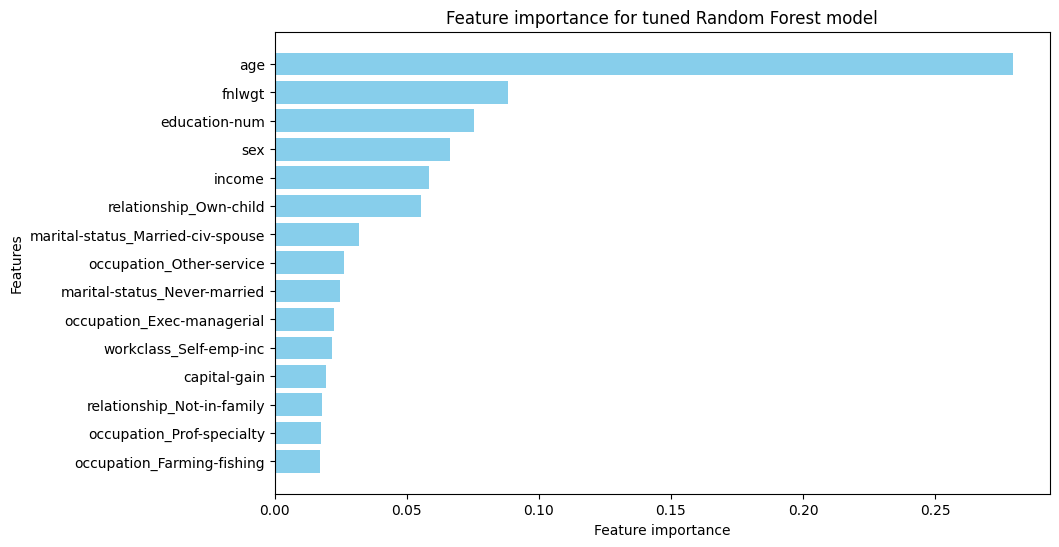

In [139]:
#Extract feature importance from the tuned RandomForest model
feature_importance = best_rf_model.feature_importances_

#Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

#Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

#Display the DataFrame
print("Feature importance - tuned Random Forest:")
print(feature_importance_df.head(15))

#Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"][:15], feature_importance_df["Importance"][:15], color='skyblue')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.title("Feature importance for tuned Random Forest model")
plt.gca().invert_yaxis() 
plt.show()


This approach helps in selecting the optimal number of features for training the tuned Random Forest model based on feature importance. First, it calculates the cumulative importance of each feature and retains only those contributing to at least 95% of the total importance. The selected features are then used to train a new Random Forest model and its performance is evaluated using standard metrics such as MAE, MSE, RMSE and R² score. The better performance of the new model suggests that eliminating less important features has no negative impact on the predictions.

In [140]:
#Compute cumulative importance
feature_importance_df["Cumulative_Importance"] = feature_importance_df["Importance"].cumsum()

#Select features that contribute to 95% of the total importance
selected_features = feature_importance_df[feature_importance_df["Cumulative_Importance"] <= 0.95]["Feature"].tolist()

#Print selected features and their count
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features}")

# Train a new RandomForest model using only the selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

best_rf_model_selected = RandomForestRegressor(**best_params, random_state=42)
best_rf_model_selected.fit(X_train_selected, y_train)

#Predict on validation set
y_val_pred_selected = best_rf_model_selected.predict(X_val_selected)

#Compute evaluation metrics
best_rf_mae_selected = mean_absolute_error(y_val, y_val_pred_selected)
best_rf_mse_selected = mean_squared_error(y_val, y_val_pred_selected)
best_rf_rmse_selected = np.sqrt(best_rf_mse_selected)
best_rf_r2_selected = r2_score(y_val, y_val_pred_selected)


#Save results in the same dictionary for consistency
results["Tuned RandomForestRegressor_SelectedFeatures(28)"] = {
    "MAE": best_rf_mae_selected,
    "MSE": best_rf_mse_selected,
    "RMSE": best_rf_rmse_selected,
    "R2": best_rf_r2_selected
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

#Display results
display(results_df)

Number of selected features: 28
Selected features: ['age', 'fnlwgt', 'education-num', 'sex', 'income', 'relationship_Own-child', 'marital-status_Married-civ-spouse', 'occupation_Other-service', 'marital-status_Never-married', 'occupation_Exec-managerial', 'workclass_Self-emp-inc', 'capital-gain', 'relationship_Not-in-family', 'occupation_Prof-specialty', 'occupation_Farming-fishing', 'workclass_Self-emp-not-inc', 'marital-status_Widowed', 'relationship_Wife', 'workclass_Private', 'capital-loss', 'occupation_Sales', 'occupation_Transport-moving', 'race_White', 'native-country_United-States', 'occupation_Craft-repair', 'relationship_Unmarried', 'workclass_State-gov', 'race_Black']


MAE       MSE  \
LinearRegression                                  0.635098  0.811954   
SGDRegressor                                      0.637655  0.813540   
HuberRegressor                                    0.614613  0.828097   
DecisionTreeRegressor                             0.813775  1.427130   
RandomForestRegressor                             0.627742  0.792422   
RidgeRegression                                   0.634998  0.811766   
LassoRegression                                   0.613671  0.971518   
Tuned RandomForestRegressor                       0.590542  0.736844   
Tuned RandomForestRegressor_SelectedFeatures(28)  0.592218  0.735400   

                                                      RMSE        R2  
LinearRegression                                  0.901085  0.180752  
SGDRegressor                                      0.901965  0.179151  
HuberRegressor                                    0.909998  0.164464  
DecisionTreeRegressor                             1.194626 -0.439951  
RandomForestRegressor                             0.890181  0.200459  
RidgeRegression                                   0.900981  0.180941  
LassoRegression                                   0.985656  0.019755  
Tuned RandomForestRegressor                       0.858396  0.256536  
Tuned RandomForestRegressor_SelectedFeatures(28)  0.857554  0.257994

# **Final report**

The objective of this project was to build regression models to predict census-related variables. Below are the key findings:


### **1. Key findings from model performance**

1.1 **Linear models (Linear Regression, Ridge, Lasso) provide a baseline but have limited predictive power**
   - Linear regression achieved an **R² score of 0.1808**, explaining only ~18% of the variance.
   - Ridge Regression performed similarly, indicating that multicollinearity wasn’t a major issue.
   - Lasso Regression underperformed (**R² = 0.0198**).

1.2 **Gradient descent-based models (SGDRegressor, HuberRegressor) show marginal differences**
   - **SGDRegressor** performed similarly to Linear Regression but scales better for large datasets.
   - **HuberRegressor**, designed for robustness against outliers, showed a slight improvement in MAE but higher MSE.

1.3 **Tree-based models perform significantly better**
   - **Decision Tree Regressor overfits significantly**, with **negative R² (-0.4399)**, meaning it fails to generalize.
   - **Random Forest Regression improves generalization**, achieving **R² = 0.2005**.

1.4 **Hyperparameter tuning enhances model performance**
   - Fine-tuning the Random Forest model led to **R² improvement from 0.2005 to 0.2565**.
   - **Feature selection further improved performance**, lowering MSE from **0.7368 to 0.7354** and increasing R² to **0.2580**.

1.5 **Feature selection impact**

   - By selecting the top 28 most important features, the tuned model’s R² slightly improved to 0.2580 and MSE decreased to 0.7354.
   - This suggests that removing irrelevant features improved performance marginally while reducing complexity.


---

### **2. Model Performance Comparison**

| Model                                      | MAE      | MSE      | RMSE     | R²       |
|--------------------------------------------|---------|---------|---------|---------|
| **LinearRegression**                       | 0.635098 | 0.811954 | 0.901085 | 0.180752 |
| **SGDRegressor**                           | 0.637655 | 0.813540 | 0.901965 | 0.179151 |
| **HuberRegressor**                         | 0.614613 | 0.828097 | 0.909998 | 0.164464 |
| **DecisionTreeRegressor**                  | 0.813775 | 1.427130 | 1.194626 | -0.439951 |
| **RandomForestRegressor**                  | 0.627742 | 0.792422 | 0.890181 | 0.200459 |
| **RidgeRegression**                        | 0.634998 | 0.811766 | 0.900981 | 0.180941 |
| **LassoRegression**                        | 0.613671 | 0.971518 | 0.985656 | 0.019755 |
| **Tuned RandomForestRegressor**            | 0.590542 | 0.736844 | 0.858396 | 0.256536 |
| **Tuned RandomForestRegressor_Selected(28)** | 0.592218 | 0.735400 | 0.857554 | 0.257994 |

---

### **3. Loss function and model selection**  

The choice of loss function was essential in optimizing model performance. **Mean Squared Error (MSE)** was primarily used due to its smooth optimization properties, despite its sensitivity to outliers. **Root Mean Squared Error (RMSE)** was preferred for its interpretability, as it maintains the same unit as the target variable, making error magnitude easier to understand. **Mean Absolute Error (MAE)** was also considered, as it is more robust to outliers than MSE.  

For model selection, **Linear Regression and Ridge/Lasso Regression** served as baselines but struggled with capturing complex relationships. **SGDRegressor** was included for its computational efficiency in large datasets. **Decision Trees captured non-linearity but overfitted easily**, whereas **Random Forest mitigated overfitting and generalized better**. The **Tuned Random Forest Regressor with feature selection** emerged as the best-performing model.

---

## **4. Conclusion**

### **Best Model Choice**
 The **Tuned Random Forest Regressor with feature selection (28 features)** had:

  - Highest R² (0.2580)
  - Lowest MSE (0.7354)
  - Reduced complexity compared to using all features


   The results show that **tree-based models outperform linear models** in predicting census-related variables. While **Linear Regression, Ridge, and Lasso** provided a baseline, they failed to capture complex relationships. **Random Forest Regression significantly improved performance**, demonstrating the power of ensemble learning. **Hyperparameter tuning further enhanced accuracy**, reducing errors and increasing R². Feature selection **slightly improved efficiency but had minimal impact on accuracy**. Overall, the **Tuned Random Forest Regressor with selected features performed best**, balancing accuracy and complexity. Notably, **polynomial features, while beneficial for linear models (e.g., Linear Regression, Ridge, Lasso), are ineffective for Random Forest**, as decision trees inherently capture non-linear patterns through recursive splits without requiring feature transformations. Future improvements could focus on boosting models (XGBoost, LightGBM), deep learning approaches, and interpretability techniques (e.g., SHAP, LIME) to further optimize predictive performance.
